In [1]:
from cobra.io import read_sbml_model
from utils import model_validation as mv

iJL432 = read_sbml_model('GEMs/iJL432.xml')

In [2]:
products = ['BUOH', 'BU', 'ACETONE', 'AC', 'ETOH']
prod_reactions = [str('EX_'+prod+'_Ext_') for prod in products]
# uptake rx: EX_DXYL_Ext_

Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.
Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.
Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.
Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.
Could not identify an external compartment by name and choosing one with the mos

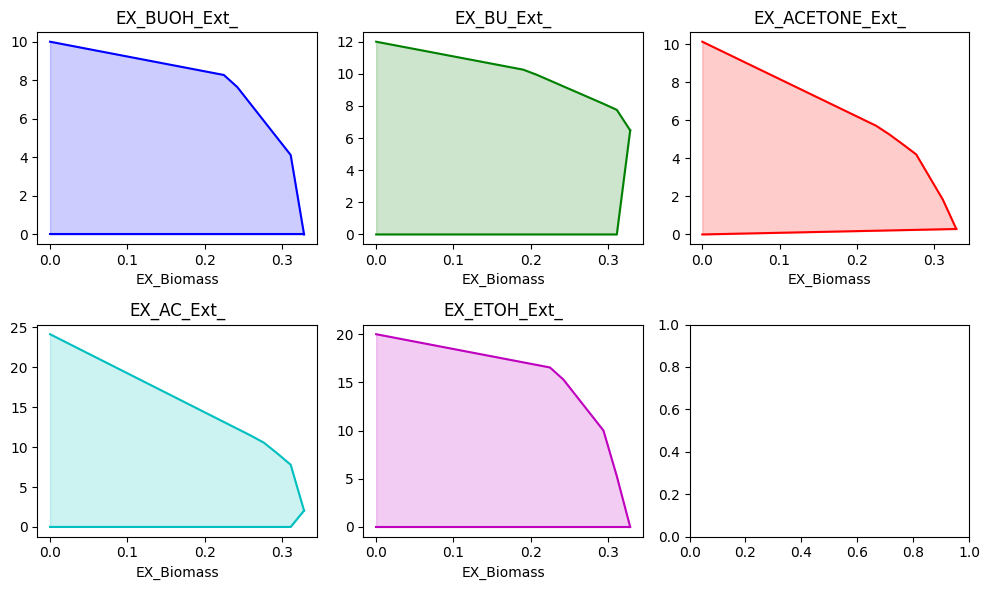

In [4]:
from utils import static_sim

static_sim.plot_flux_envelopes(iJL432, reactions=prod_reactions, BM_func='EX_Biomass')

In [10]:
iJL432.reactions.EX_ETOH_Ext_

Reaction identifier,EX_ETOH_Ext_
Name,EX_ETOH_Ext_
Memory address,0x127621f60
Stoichiometry,ETOH_Ext__Cell <=> ETOH_Ext_ <=>
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [3]:
iJL432.reactions.EX_Biomass

Reaction identifier,EX_Biomass
Name,EX_Biomass
Memory address,0x12cc47a00
Stoichiometry,BIOMASS_Cell --> BIOMASS -->
GPR,
Lower bound,0.0
Upper bound,1000.0


In [16]:
iJL432.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
GLC_Ext__Cell,EX_GLC_Ext_,10,0,0.00%
NH3_Ext__Cell,EX_NH3_Ext_,2.585,0,0.00%
PABA_Ext__Cell,EX_PABA_Ext_,0.005213,0,0.00%
Pi_Ext__Cell,EX_Pi_Ext_,0.2976,0,0.00%
SO4_Ext__Cell,EX_SO4_Ext_,0.3571,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
ACETONE_Ext__Cell,EX_ACETONE_Ext_,-0.287,0,0.00%
AC_Ext__Cell,EX_AC_Ext_,-2.05,0,0.00%
BU_Ext__Cell,EX_BU_Ext_,-6.48,0,0.00%
BIOMASS_Cell,EX_Biomass,-0.3287,0,0.00%


In [87]:
essential_rxns = ['EX_PABA_Ext_', 'EX_SO4_Ext_', 'EX_NH3_Ext_', 'EX_Pi_Ext_', 'EX_DXYL_Ext_', 'EX_GLC_Ext_']

medium = {rx:0 for rx in iJL432.medium.keys()}

for rx in essential_rxns:
    medium[rx] = 10

Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


In [88]:
with iJL432 as model:
    iJL432.medium = medium
    sol = iJL432.optimize()

Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


In [89]:
sol

,fluxes,reduced_costs
GLCpts,10.000000,0.065748
FRUpts,0.000000,0.065748
MNLpts,0.000000,0.059173
MANpts,0.000000,0.065748
LACTpts,0.000000,0.131496
...,...,...
EX_LSER_Ext_,0.000000,0.000000
EX_PYR_Ext_,0.000000,0.000000
EX_DXYL_Ext_,-0.000000,0.000000
EX_LTHR_Ext_,0.000000,0.000000


In [7]:
# set medium to be xylose minimal medium
# TODO

In [21]:
iJL432.reactions.rBIOMASS.metabolites

{<Metabolite ATP_Cell at 0x12098ca90>: -40.0,
 <Metabolite CARBO_Cell at 0x12098d3c0>: -0.0432,
 <Metabolite DNA_Cell at 0x12098f460>: -0.026,
 <Metabolite PEPTIDO_Cell at 0x120949e70>: -0.1009,
 <Metabolite PLIPID_Cell at 0x12098d5a0>: -0.076,
 <Metabolite PROTEIN_Cell at 0x12098f1f0>: -0.5284,
 <Metabolite RNA_Cell at 0x12094bb50>: -0.0655,
 <Metabolite TEICH_Cell at 0x12094bc70>: -0.08,
 <Metabolite TRACE_Cell at 0x12094b820>: -0.0494,
 <Metabolite ADP_Cell at 0x12098c280>: 40.0,
 <Metabolite BIOMASS_Cell at 0x12098d840>: 1.0,
 <Metabolite Pi_Cell at 0x12098c460>: 40.0}